In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import math
from numpy.linalg import inv
from numpy import linalg as la

In [3]:
 # definisco la funzione per trovare il vettore vicino all'atomo di iridio

def nearint(q):
    if(q-int(q)<-0.5):
        return(int(q)-1)
    if(q-int(q)>0.5):
        return(int(q)+1)
    if((q-int(q))<=0.5 and (q-int(q)>=-0.5)):
        return(int(q))
    
def proporz(dif):
    c1=1.
    c2=1.
    if (dif>0):
        dif=c1*dif
    else:
        dif=c2*dif
    return dif
def rot(theta):
    R=np.matrix([[np.cos(theta), np.sin(theta)],
                     [-np.sin(theta), np.cos(theta)]])
    
    return R

In [4]:
# introduco la rotazione del grafene rispetto all'iridio ed il cambio di base per ridurre la richiesta di calcolo

def cella(theta): 
    R=rot(theta)
    provh1=[[0.],
           [math.sqrt(2)/2.]]
    h1 = 3.84*np.array(provh1)


    provh2=[[math.sqrt(11/8)],
           [math.sqrt(2)/4.]]  
    h2 = 3.84*np.array(provh2)


    provg1=[[math.sqrt(3)/2.],
           [0.5]]
    g1=R*(2.46*np.array(provg1))

    provg2=[[math.sqrt(3)/2.],
           [-0.5]]
    g2=R*(2.46*np.array(provg2))

    a = np.array([[ 3.84*0., 3.84*math.sqrt(11./8.)], 
                [3.84*math.sqrt(2)/2. , 3.84*math.sqrt(2)/4.]]) #matrice con colonne i vettori di base dell'iridio



    B=inv(a)

    #vettori del grafene su base di h1 h2 
    err=0.005
    g1h=B*g1 #vettori grafene espressi nella base dell'iridio
    g2h=B*g2
    provretu=[]
    proverror=[]
    for i in range(-80,81):
        if i!= 0:
            for j in range(-80,81):
                if j!=0:
            
                    gh=i*g1h+j*g2h #prendiamo la combinazione lineare dei vettori del grafene espressi nella base ortonormale e la chiamiamo gh
                   
                    f=gh[0,0]-nearint(gh[0,0])  #distanza tra presunto vettore della supercella e atomo di iridio
                    m=gh[1,0]-nearint(gh[1,0])
                   
                    dif=np.array([f,
                                  m])
                    dif1=np.dot(a,dif)
                
                    # cerchiamo i vettori della supercella contenuti in un raggio attorno agli atomi di iridio
                    
                    if (math.sqrt(proporz(dif1[0])**2+proporz(dif1[1])**2)<=err*la.norm(i*g1+j*g2)):
                        provretu.append(a*gh) #esprimo nel piano cartesiano originale
                        proverror.append(math.sqrt(proporz(dif1[0])**2+proporz(dif1[1])**2)/la.norm(i*g1+j*g2))
                
    min1=provretu[0] #provretu è lista di vettori che ben approssimano, ossia soddisfano la condizione precedente
    min2=provretu[0]
    for i in range(len(provretu)):
        provretu[i]=np.squeeze(np.asarray(provretu[i]))

    return [provretu,proverror]
    

In [5]:
def mininrange(angmin,angmax):
    a=[] 
    for i in range(angmin,angmax):
       
        a.append(cella(i*np.pi/180.)) # a è una lista che ha come elementi tutti i min 1 e min 2 per ogni grado
    
        
        
    lenmax=160 #lunghezza massima fino a cui medio gli errori relativi
    min=0
    minI=0
    countnum=0
    for j in range(len(a[0][0])):           #minI+angmin è l'angolo che minimizza, 
        if (la.norm(a[0][0][j])<lenmax):    #a[min] è la lista di vettori ed errori corrispondenti
                                            #all'angolo che minimizza
            countnum+=1
            min+=la.norm(a[0][1][j])
    min=min/countnum
    countnum=0
    counter=0
    agrmnt=[]
    for i in range(len(a)):
        for j in range(len(a[i][0])):
            if (la.norm(a[i][0][j])<lenmax):
                countnum+=1
                counter+=la.norm(a[i][1][j])
        if(countnum>=1):
            counter=counter/countnum #qui faccio la media dei displacement; medio per non preferire le configurazioni
                                     #in cui non ho sovrapposizione(perché se non ho sovrapposizione, la somma degli 
                                     #errori è zero)
            
        else:
            counter=100000
            print(i+angmin,0)
        if (counter<min):
            min=counter
            minI=i
        agrmnt.append(counter)
        counter=0
        countnum=0
    return [a[0],minI+angmin, agrmnt]
        

angolo: 7


<IPython.core.display.Javascript object>


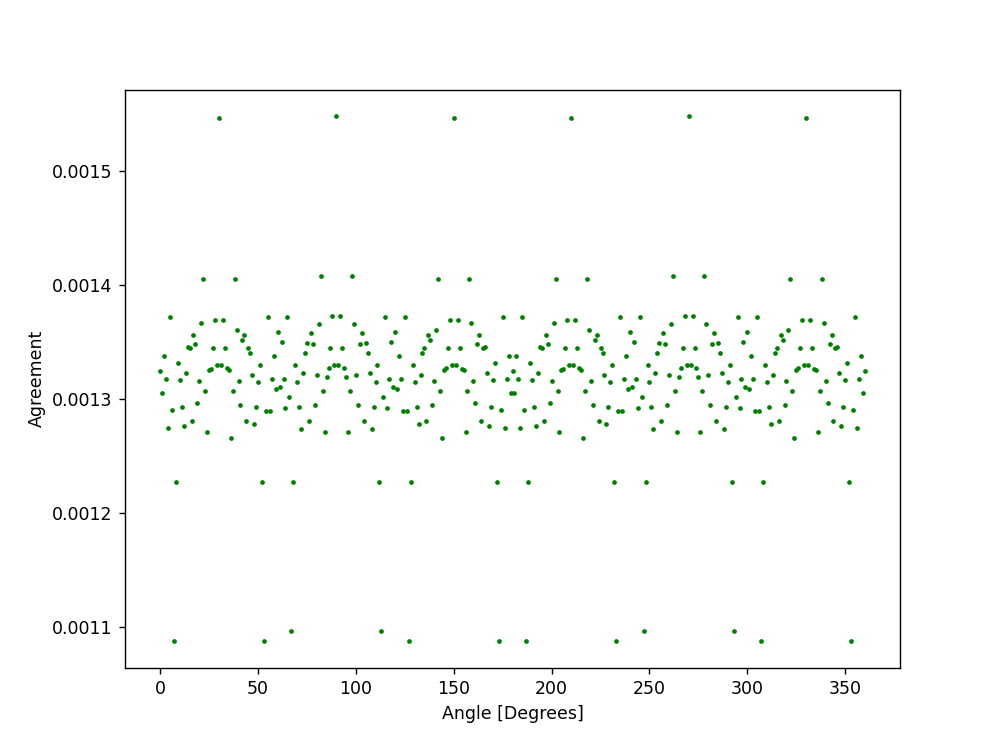

<function matplotlib.pyplot.show(block=None)>

In [7]:
supercella=mininrange(0, 361)
print('angolo:', supercella[1])

x = np.linspace(0, 360, 361)

plt.figure(1)
plt.xlabel('Angle [Degrees]') #labels
plt.ylabel('Agreement')
plt.scatter(x, supercella[2], s=3, c='g')
plt.show

In [6]:
provh1=[[0.],
       [math.sqrt(2)/2.]]
h1 = 3.84*np.array(provh1)


provh2=[[math.sqrt(11/8)],
       [math.sqrt(2)/4.]]
h2 = 3.84*np.array(provh2)

provg1=[[math.sqrt(3)/2.],
       [0.5]]

g1=rot(supercella[1]*math.pi/180)*(2.46*np.array(provg1))



provg2=[[math.sqrt(3)/2.],
       [-0.5]]

g2=rot(supercella[1]*math.pi/180)*(2.46*np.array(provg2))



htot=[]
gtot=[]
for i in range(-50,50):
    for j in range(-50,50):
        h=i*h1+j*h2
        g=i*g1+j*g2
        htot.append(h)
        gtot.append(g)


plt.figure(2)
plt.scatter(*zip(*htot), s=0.5)
plt.scatter(*zip(*gtot), s=0.5)
plt.scatter(*zip(*supercella[0][0]), s=3.,c='k')
plt.scatter(0,0,s=3.,c='k') #origine

plt.show

NameError: name 'supercella' is not defined

#### grafico supercella con angolo di rotazione pari a 7 gradi

<IPython.core.display.Javascript object>


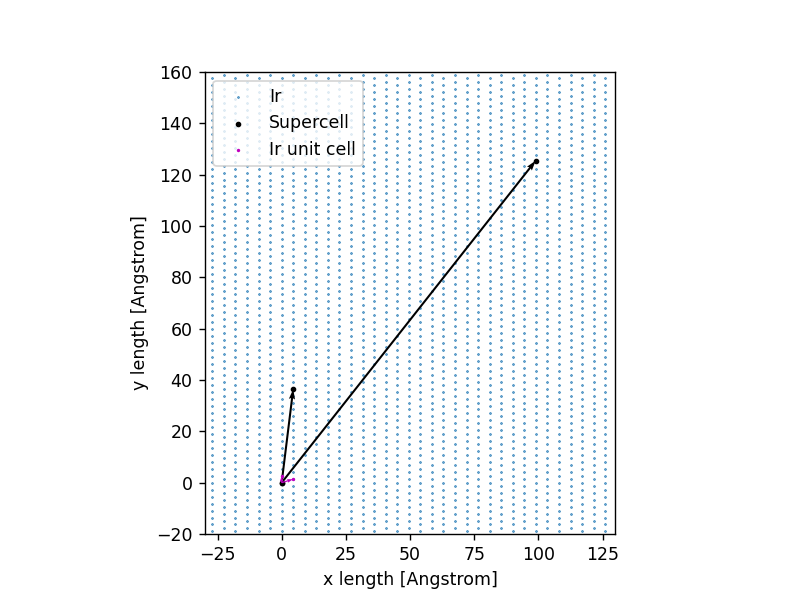

<function matplotlib.pyplot.show(block=None)>

In [7]:
# iridio
provh1=[[0.],
       [math.sqrt(2)/2.]]
h1 = 3.84*np.array(provh1)


provh2=[[math.sqrt(11/8)],
       [math.sqrt(2)/4.]]
h2 = 3.84*np.array(provh2)

# grafene
provg1=[[math.sqrt(3)/2.],
       [0.5]]
g1=rot(60*math.pi/180)*(2.46*np.array(provg1))


provg2=[[math.sqrt(3)/2.],
       [-0.5]]
g2=rot(60*math.pi/180)*(2.46*np.array(provg2))

#supercella
ps1=np.array([[99],
    [125.5]])

ps2=np.array([[4.5],
    [36.5]])

s1=np.array(ps1)
s2=np.array(ps2)

htot=[]
gtot=[]
stot=[]

for i in range(-80,80):
    for j in range(-80,80):
        h=i*h1+j*h2
        g=i*g1+j*g2 
        #s=i*s1+j*s2
        #stot.append(s)
        htot.append(h)
        gtot.append(g)

for l in range(0,2):
    for m in range(0,2):
        s=l*s1+m*s2
        stot.append(s)
       #print(stot)
    

plt.figure(4)
plt.scatter(*zip(*htot), s=0.2, label='Ir')
#plt.scatter(*zip(*gtot), s=0.5, label='Graphene')
plt.scatter(*zip(*stot), s=5, c='k', label='Supercell')
plt.scatter(0,0,s=5.,c='k') #origine


plt.quiver([0,0], [0,0], [ps1[0],ps2[0]], [ps1[1], ps2[1]], angles='xy', scale_units='xy', scale=1, width=0.005)
plt.quiver([0,0], [0,0], [h1[0],h2[0]], [h1[1], h2[1]], angles='xy', scale_units='xy', scale=1, color='m', width=0.003)
plt.scatter((h1[0],h2[0]), (h1[1],h2[1]), s=0.9, c='m', label='Ir unit cell')

plt.xlabel('x length [Angstrom]') 
plt.ylabel('y length [Angstrom]')



plt.axis('square')

plt.xlim(-30,130)
plt.ylim(-20,160)


plt.legend(loc='upper left')

plt.show

In [9]:
# definiamo i rapporti tra vettori della supercella e iridio

print('scella1', la.norm([[ps1[0]], 
                          [ps1[1]]]) )
scella1=la.norm([[ps1[0]], 
                          [ps1[1]]])
print('scella2', la.norm([[ps2[0]], 
                          [ps2[1]]]))

scella2=la.norm([[ps2[0]], 
                          [ps2[1]]])

print('rapporto', scella1/scella2)


provh1=[[0.],
       [math.sqrt(2)/2.]]
h1 = 3.84*np.array(provh1)
print('h1', la.norm(h1))

provh2=[[math.sqrt(11/8)],
       [math.sqrt(2)/4.]]
h2 = 3.84*np.array(provh2)
print('h2', la.norm(h2))

scalarproduct = (ps1[0]*ps2[0])+(ps1[1]*ps2[1])
normproduct = scella1*scella2
thetasuper = np.arccos(scalarproduct/normproduct)*180/np.pi
print('angolo tra i vettori della supercella', thetasuper)




scella1 159.84758365392952
scella2 36.776351096866584
rapporto 4.346477529347625
h1 2.7152900397563426
h2 4.703020306143702
angolo tra i vettori della supercella [31.23955642]


In [11]:
theta = np.arccos(ps2[1]/scella2)*180/np.pi #angolo tra vettore supercella piccolo e vettore piccolo iridio
thetaproiez = 73.2 - thetasuper - theta
print(thetaproiez)
print('rapporto lato corto',ps2[1]/la.norm(h1))
print('proiezioni su lato lungo', scella1*np.cos(thetaproiez*np.pi/180)/la.norm(h2)) #proiezione vettore supercella lungo il vettore di iridio


[34.93204734]
rapporto lato corto [13.44239454]
proiezioni su lato lungo [27.86467254]
